# Le Classifieur SVM Classifier pour des données non-séparables

In [125]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. Construisons notre "XOR" dataset

Essayer de classifier un dataset linéairement non séparable


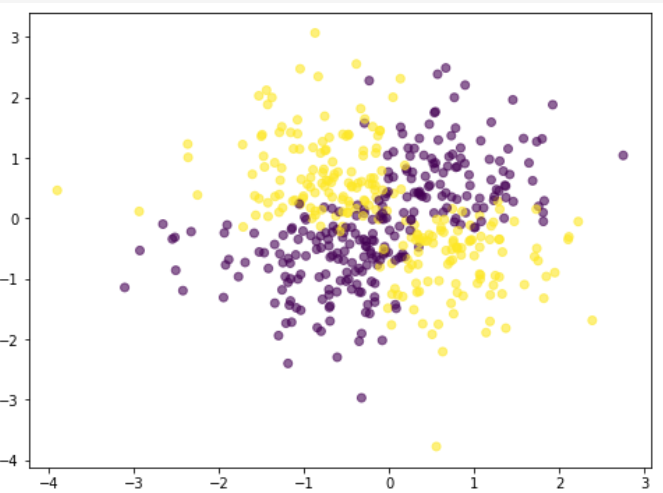


Pour cela, nous allons créer un ensemble de données 2D en utilisant des [portes XOR logiques](https://en.wikipedia.org/wiki/XOR_gate)

Essayez de comprendre comment cela fonctionne en jouant avec `np.logical_xor` dans les cellules ci-dessous :

In [127]:
# Si on a deux valeurs semblable, alors cela renvoie False sinon True

print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))
print(np.logical_xor(False, True))

False
True
False
True


In [128]:
print(np.logical_xor([True, True, False, False], [True, False, False, True]))

[False  True False  True]


Créaons notre propre jeu de données 2D synthétiques où:

$$ y =
\begin{cases}
    1 & \text{if } (X_1>0 \textbf{ xor } X_2>0) \\
    0 & \text{otherwise}
\end{cases}
$$


In [129]:
# Number of datapoints
n = 500
noise = 0.2

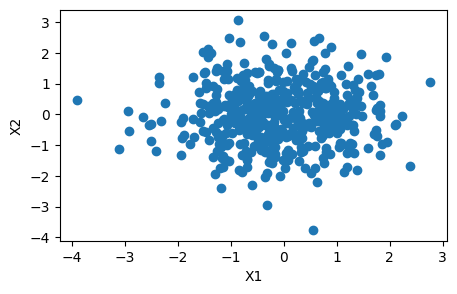

In [130]:
rng = np.random.default_rng(0)
X = rng.standard_normal((n, 2))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [131]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

(500, 2)


In [132]:
# Then, build our binary class y
# where y=1 if and only if (X1 > ε xor X2 > ε)
# epsilon ε not exactly zero to simulate "noise"

epsilon = noise * rng.standard_normal(n)

y_bool = np.logical_xor(
    x1 > epsilon,
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)
print(y)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1
 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 1 1 1 0 0 0 1 0 0 1 0 1 

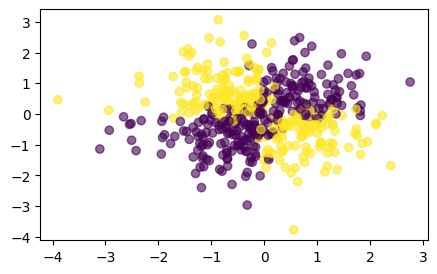

In [133]:
# We have re-created the XOR quadrant!
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.show()

## 2 - Linear SVM

_Support Vector Machine (SVM)_ 🎉

Le classifieur SVM linéaire a pour but de trouver the meilleur vecteur  **w**

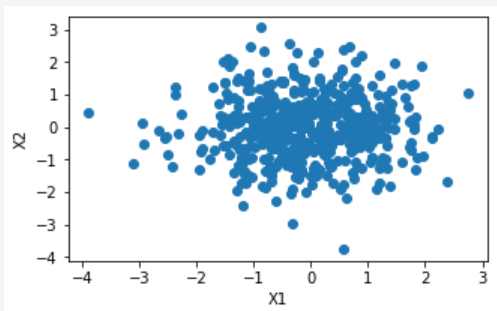

- dont la direction détermine de manière unique l'hyperplan de la frontière de décision
- et minimise la somme des pertes 'hinge' pour les valeurs aberrantes

👉 **w** contient tous les paramêtres appris pendant l'apprentissage `.fit()`  
👉 `C` est le **coût** associé avec la **mauvaise** classification

___
❓ Fit un **linear** classifieur SVC classifier sur le dataset complet avec la valeur  `C` = 1.

In [134]:
from sklearn.svm import SVC
C=1
model = SVC(C=1, kernel="linear")

model.fit(X,y)

SVC(C=1, kernel='linear')

[texte du lien](https://)❓ Visualise la frontière de décision du modèle en utilisant la fonction `plot_decision_regions` donnée dans `utils/plots.py`

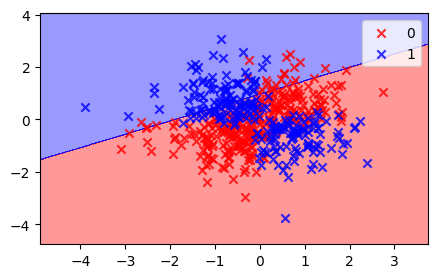

In [135]:
from plots import plot_decision_regions
linear_decision = plot_decision_regions(X,y, model)

❓Enregistrez ci-dessous votre score de précision « estimé » pour ce modèle (environ)


In [136]:
linear_svm_score = model.score(X, y)

In [137]:
linear_svm_score

0.618



❓ Pensez-vous que la valeur de « C » a une importance dans ce cas ?


Réponse : Non car la valeure par défaut est déjà 1

## 3.2 Kernels

Un 'kernel' de dégrès 2 est de la forme suivante:

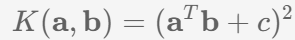

En changeant le noyau, nous avons changé notre notion de _similarité_ : au lieu de mesurer la similarité en fonction de la proximité des points en termes de produit scalaire (« similarité cosinus ») pour le noyau linéaire, nous mesurons la similarité en fonction **du fait que les points sont ou non dans un cercle.**

C'est équivalent à créer des caractéristiques quadratiques comme en dessous :
---
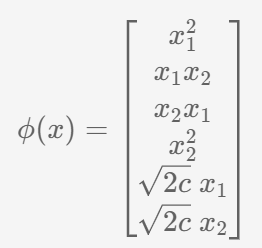

❓Intuitivement parlant, quel est selon vous le nombre minimum de « degrés » de noyau « d » dont nous avons besoin pour adapter au mieux notre ensemble de données XOR ?




Réponse : Je pense qu'il faudrait au moins 51%

❓Ajustez et tracez un « poly » SVM de degré 2, en gardant « C = 100 » suffisamment grand pour visualiser le « classificateur de marge maximale »

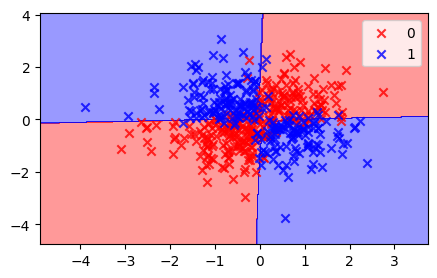

In [138]:
SVM_degres_2 = SVC(kernel='poly', degree=2, C=100)
model_degres = SVM_degres_2.fit(X, y)
plot_decision_regions(X,y, model_degres)

In [139]:
model_degres.score(X, y)

0.894

❓Étant donné que vous savez comment cet ensemble de données XOR a été conçu, quels adjectifs décrivent le mieux les performances de votre SVM ?

In [140]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"

poly_svm_performance = d


❓ Toujours pas convaincu ? Vous pouvez vérifier que le noyau polynomial équivaut à avoir accès aux fonctionnalités polynomiales en ajustant ce modèle ci-dessous :

- Nous créons des fonctionnalités polynomiales dans un premier temps (ingénierie des fonctionnalités)
- puis nous ajustons un SVM linéaire.


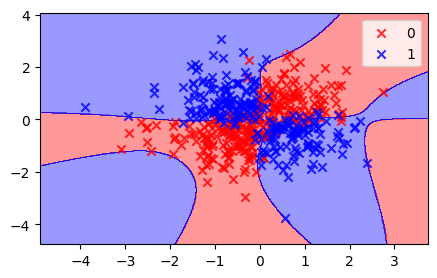

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Choose your degree
degree = 5

equivalent_polynomial_model = make_pipeline(
    (PolynomialFeatures(degree=degree)),  # First, create all polynomial combinations of your features
    (SVC(kernel="linear", C=100))  # Then, fit a linear SVM
)
equivalent_polynomial_model.fit(X, y)
plot_decision_regions(X, y, classifier=equivalent_polynomial_model)

☝️ Bien que mathématiquement équivalente, cette ingénierie manuelle des fonctionnalités nécessite beaucoup plus de puissance de calcul que l'astuce du noyau et ne s'adaptera pas à une dimensionnalité plus élevée !

### Moons dataset

Essayons maintenant avec un ensemble de données plus difficile à classer !




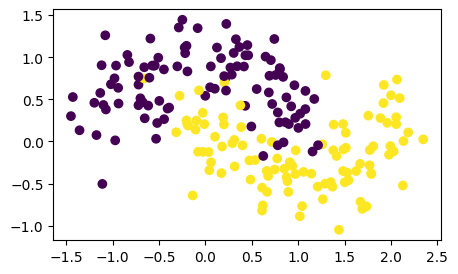

In [142]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

❓ Essayez d'adapter un noyau SVM polynomial à cet ensemble de données

Essayez-le **visuellement** ci-dessous en modifiant les valeurs de `C` et `degree` et `coef0`.

`coef0` joue le rôle de $c$ dans $K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^d$
- Lorsqu'il est égal à 0, vous n'avez accès qu'aux caractéristiques polynomiales de degré d
- Plus il est élevé, plus votre modèle prendra en compte les caractéristiques de degré inférieur

In [143]:
from ipywidgets import interact

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9], coef0=[0,0.5,1,2,5,10,100])
def svc(C, degree, coef0):
    svm = SVC(kernel='poly', C=C, coef0=coef0, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr…

☝️Un noyau polynomial peut s'adapter à peu près à tout, à condition que le degré soit suffisamment élevé.

Cependant, sachez que les noyaux polynomiaux avec un degré trop élevé rendront les modèles sujets au surajustement !

## 3.3 RBF - Radial Basis Function Kernel (aka gaussian)

Voici le noyau RBF !
Il s'agit pratiquement du noyau de référence pour SVM (et celui par défaut dans sklearn).

Il s'avère très robuste face à une variété de problèmes et est plus facile à affiner que le polynôme, car il ne nécessite qu'une recherche par grille de son hyper-paramètre de noyau `gamma` $\gamma$, en plus de `C` bien sûr

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- Plus la distance euclidienne entre deux points $||\textbf{a}-\textbf{b}||^2$ est grande, plus la fonction noyau est proche de zéro. Cela signifie que deux points éloignés sont plus susceptibles d'être différents.

- `gamma` $\gamma$ réduit la portée d'influence de chaque instance sur les autres (**myopie**). Des valeurs $\gamma$ plus fortes rendront votre modèle surajusté en regardant « trop attentivement » les irrégularités à petite échelle

- `C` contrôle toujours la **dureté** de la marge. Des valeurs plus fortes rendront votre modèle surajusté.

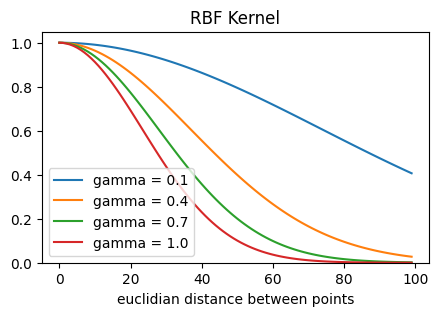

In [144]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

❓ Ajuster et tracer les régions de décision d'un classificateur SVM avec un noyau RBF

- Commencer avec un modèle avec une variance très faible (ex : `gamma=0.01` et `C=0.1`)
- Augmenter `gamma` jusqu'à ce que vous observiez un sur-ajustement évident. Il doit être clairement visible sur le graphique.

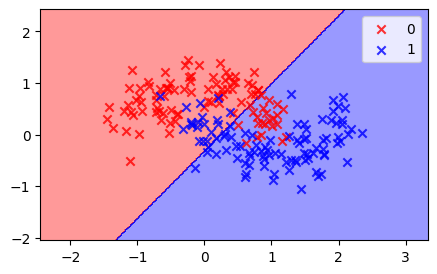

In [145]:
model = SVC(kernel='rbf', gamma=0.01, C=0.1)
model.fit(X, y)
plot_decision_regions(X, y, classifier=model)

❓ Maintenant, utilisez votre meilleure valeur estimée de gamma (par exemple « gamma = 1 ») et augmentez « C » cette fois jusqu'à ce que vous soyez surajusté


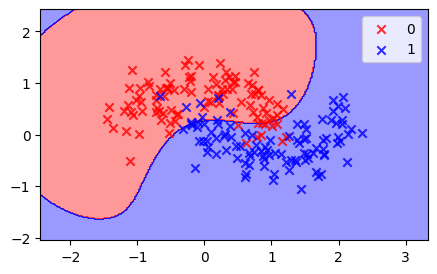

In [146]:
model = SVC(kernel='rbf', gamma=1, C=0.1)
model.fit(X, y)
plot_decision_regions(X, y, classifier=model)

☝️ N'hésitez pas à créer votre propre tracé interactif en utilisant `@interact` comme ci-dessus et essayez de trouver « visuellement » les meilleurs « C » et « gamma »

In [147]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10])
def svc(C=1, gamma=1):
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=1, options=(0.1, 1, 10, 100, 1000, 10000), value=1), Dro…

❓Stockez ci-dessous votre meilleure estimation visuelle pour C et gamma (arrondie à des puissances de dix : 0,1, 1, 10, 100...)

In [148]:
### C'est les plus précis tout en permettant de voir le mieux possible
best_c = 100 
best_gamma = 10

## 3.4 Sigmoid kernel

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

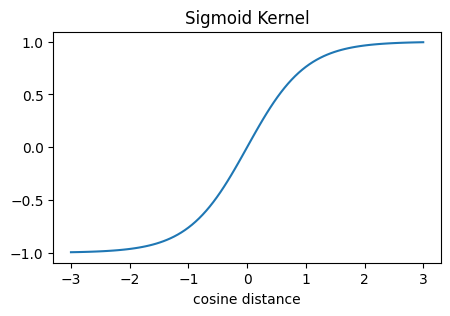

In [149]:
# The "tangent hyperbolic" function resembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

☝️ Le noyau sigmoïde compresse la « similarité cosinus » utilisée dans le noyau linéaire dans un intervalle [-$\gamma$,+$\gamma$].

❓ Essayez d'affiner **visuellement** votre modèle avec le noyau sigmoïde, en effectuant une recherche grossière pour
- `C=[0.1, 1, 10, 100, 1000, 10000]`
- `gamma = [0.001, 0.01, 0.1, 1, 10]`

en utilisant le décorateur `@interact` combiné avec la fonction `plot_decision_regions`

In [150]:
@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10], coef0=0.)
def svc(C=1000, gamma=0.1, coef0=0):
    svm = SVC(kernel='sigmoid', gamma=gamma, C=C, coef0=coef0)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=4, options=(0.1, 1, 10, 100, 1000, 10000), value=1000), …

☝️ Pas facile de le faire fonctionner visuellement, n'est-ce pas ? Il est temps d'utiliser un GridSearch automatisé !

## 4. Grid Search le meilleur kernel

❓ `RandomizedSearchCV` pour le meilleur `kernel` et les meilleurs hyperparamètres de noyau en même temps (avertissement : scikit-learn a des problèmes lors de la recherche de grille de noyaux polynomiaux en même temps que d'autres)

Utilisez vos intuitions visuelles ci-dessus pour définir des plages de valeurs plausibles à tester

In [151]:
params =[{'C' : [0.1],
         'gamma' : [1],
         'kernel': ['poly','sigmoid','linear','rbf'],}
]

In [152]:
from sklearn.model_selection import RandomizedSearchCV
best_kernel = SVC()
best_kernel = RandomizedSearchCV(best_kernel,param_distributions=params )
best_kernel.fit(X, y)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [0.1], 'gamma': [1],
                                         'kernel': ['poly', 'sigmoid', 'linear',
                                                    'rbf']}])

❓ Tracez les limites de décision de votre meilleur modèle

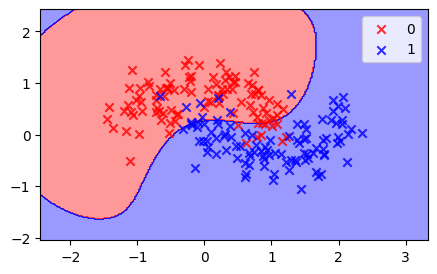

In [153]:
plot_decision_regions(X, y, classifier=best_kernel)

❓ Validez sa précision en 5 étapes et stockez votre résultat moyen sous le nom « best_svm_cv_accuracy »

In [154]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_kernel, X, y, cv=5)
print(scores)
best_svm_cv_accuracy = max(scores)
print(best_svm_cv_accuracy)

[0.9   0.925 0.875 0.825 0.975]
0.975


## 5. Generalisation

Après quelques jours, le modèle a reçu et prédit de nouveaux points de données qu'il n'avait jamais vus auparavant (notre « ensemble de test »)

In [155]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

❓ Visualisez ses performances en exécutant `plot_decision_regions` en incluant `test_idx` comme argument optionnel.
Comptez le nombre d'échantillons de test mal classés que vous obtenez !

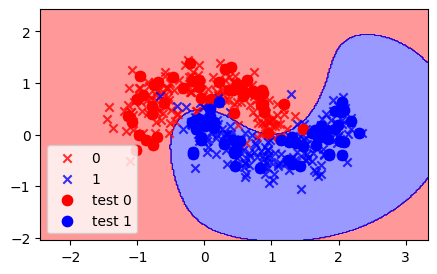

In [156]:
plot_decision_regions(X_full, y_full, classifier=SVC().fit(X_test,y_test),test_idx=test_idx)
number_misclassified_test = "Je dirais environ 18"

## 6. kNN vs. SVM ?

Un tel problème non linéaire pourrait également s'adapter à un classificateur KNN.

Essayez de trouver le meilleur K visuellement et comparez son comportement à celui du SVM.

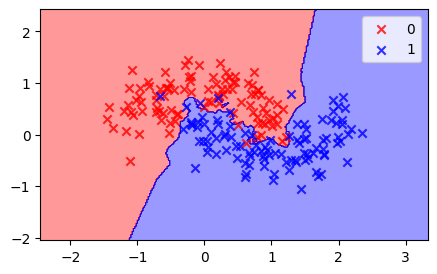

In [157]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X,y)

plot_decision_regions(X, y, classifier=neighbors)
# n = 3 is the more efficient


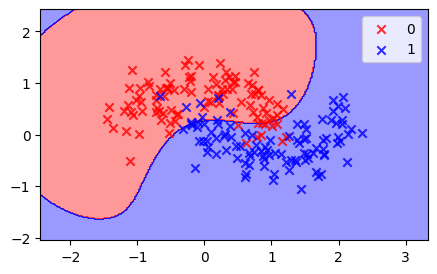

In [158]:
# We just rewrite this to ensure this is the best
from sklearn.model_selection import RandomizedSearchCV
best_kernel_1= SVC()
best_kernel_1 = RandomizedSearchCV(best_kernel_1,param_distributions=params )
best_kernel_1.fit(X, y)

plot_decision_regions(X, y, classifier=best_kernel_1)

In [162]:
print(best_kernel_1.score(X,y))
print(neighbors.score(X,y))

0.91
0.955


*For my case, the most efficient is the neighbors*

🏁 Félicitations ! N'oubliez pas d'**envoyer** le carnet sur Moodle !
